In [1]:
!git clone https://github.com/Sanket-DataEnt/groot.git

Cloning into 'groot'...
remote: Enumerating objects: 282, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 282 (delta 69), reused 53 (delta 22), pack-reused 162
Receiving objects: 100% (282/282), 41.75 MiB | 16.02 MiB/s, done.
Resolving deltas: 100% (164/164), done.


In [1]:
%cd /content/groot/CIFAR

/content/groot/CIFAR


In [3]:
! pip install -U albumentations torch-lr-finder grad-cam pytorch-lightning -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 31.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.8/722.8 kB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.1/731.1 kB 47.4 MB/s eta 0:00:00


In [2]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl

In [9]:
from models import custom_resnet_module
model = custom_resnet_module.Model()

In [6]:
# Call the prepare_data and setup methods to download and set up the data
model.prepare_data()
model.setup()

# Retrieve the train and validation data loaders
trainloader = model.train_dataloader()
valloader = model.val_dataloader()

100%|██████████| 170498071/170498071 [00:05<00:00, 29185826.05it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/dropout/cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


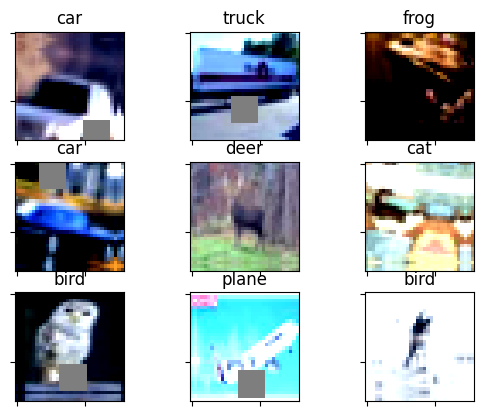

In [7]:
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

from utilities.utils import visualize_images
# Visualizing 10 images
n=9
visualize_images(n, images, labels, classes)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Files already downloaded and verified
Files already downloaded and verified


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.15E-03


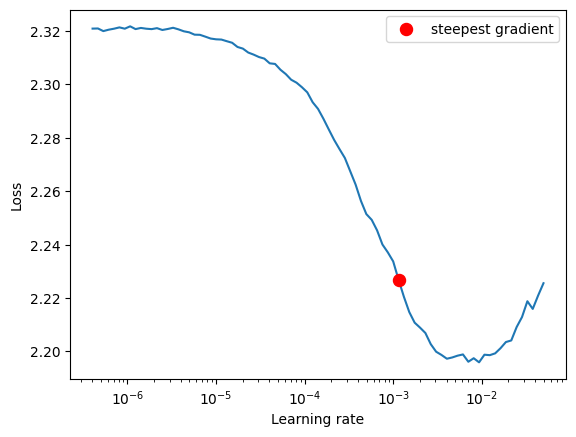

INFO:pytorch_lightning.callbacks.model_summary:
   | Name          | Type             | Params
----------------------------------------------------
0  | criterion     | CrossEntropyLoss | 0     
1  | prep_layer    | Sequential       | 1.9 K 
2  | prep_layer.0  | Conv2d           | 1.7 K 
3  | prep_layer.1  | BatchNorm2d      | 128   
4  | prep_layer.2  | ReLU             | 0     
5  | layer1_x      | Sequential       | 74.0 K
6  | layer1_x.0    | Conv2d           | 73.7 K
7  | layer1_x.1    | MaxPool2d        | 0     
8  | layer1_x.2    | BatchNorm2d      | 256   
9  | layer1_x.3    | ReLU             | 0     
10 | layer1_r1     | Sequential       | 295 K 
11 | layer1_r1.0   | Sequential       | 147 K 
12 | layer1_r1.0.0 | Conv2d           | 147 K 
13 | layer1_r1.0.1 | BatchNorm2d      | 256   
14 | layer1_r1.0.2 | ReLU             | 0     
15 | layer1_r1.1   | Sequential       | 147 K 
16 | layer1_r1.1.0 | Conv2d           | 147 K 
17 | layer1_r1.1.1 | BatchNorm2d      | 256   
18 | l

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=24` reached.


In [10]:
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ModelSummary, LearningRateMonitor

max_epochs=None
precision="32-true"
trainer = Trainer(callbacks=[ModelSummary(max_depth=10), LearningRateMonitor(logging_interval='step')],
                        max_epochs=max_epochs or model.max_epochs, precision=precision)

trainer.fit(model)

### Saving Model Dictionary

In [ ]:
torch.save(model.state_dict(), "model.pth")
model.load_state_dict(torch.load("model.pth"), strict=False)

### Checking Misclassified Data

In [15]:
# def get_misclassified_data(model, test_loader):
#     """
#     Function to run the model on test set and return misclassified images
#     :param model: Network Architecture
#     :param device: CPU/GPU
#     :param test_loader: DataLoader for test set
#     """
#     # Prepare the model for evaluation i.e. drop the dropout layer
#     model.eval()
#     # List to store misclassified Images
#     misclassified_data = []
#     # Reset the gradients
#     with torch.no_grad():
#         # Extract images, labels in a batch
#         for data, target in test_loader:
#             # Migrate the data to the device
#             # data, target = data.to(device), target.to(device)
#             # Extract single image, label from the batch
#             for image, label in zip(data, target):
#                 # Add batch dimension to the image
#                 image = image.unsqueeze(0)
#                 # Get the model prediction on the image
#                 output = model(image)
#                 # Convert the output from one-hot encoding to a value
#                 pred = output.argmax(dim=1, keepdim=True)
#                 # If prediction is incorrect, append the data
#                 if pred != label:
#                     misclassified_data.append((image, label, pred))
#     return misclassified_data

# def show_images(net, testloader, classes, flag):
#   net.eval()
#   missed = []
#   pred = []
#   targ = []
#   empty_tensor = torch.tensor([])#.to(device)
#   with torch.no_grad():
#       pbar1 = tqdm(testloader)
#       for i, (data, target) in enumerate(pbar1):
#           #  data, target = data.to(device), target.to(device)
#            outputs = net(data)
#            _, predicted = torch.max(outputs.data, 1)
#            target1 = target.cpu().numpy()
#            predicted1 = predicted.cpu().numpy()
#            for i in range(64):
#              if flag==1:
#               if target1[i]==predicted1[i]:
#                  missed.append(i)
#                  new_tensor = data[i].unsqueeze(0)
#                  empty_tensor = torch.cat((empty_tensor, new_tensor), dim=0)
#                  pred.append(predicted1[i])
#                  targ.append(target1[i])
#              else:
#               if target1[i]!=predicted1[i]:
#                  missed.append(i)
#                  new_tensor = data[i].unsqueeze(0)
#                  empty_tensor = torch.cat((empty_tensor, new_tensor), dim=0)
#                  pred.append(predicted1[i])
#                  targ.append(target1[i])
#            break

#   plt.subplots_adjust(left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.4,
#                     hspace=0.4)
#   for i in range(0,10):
#    plt.subplot(5, 2, i+1)
#    frame1 = plt.gca()
#    frame1.axes.xaxis.set_ticklabels([])
#    frame1.axes.yaxis.set_ticklabels([])
#    plt.imshow(np.transpose(((data[missed[i]].cpu()/2)+0.5).numpy(),(1,2,0)))
#    plt.ylabel("GT:"+str(classes[target1[missed[i]]])+'\nPred:'+str(classes[predicted1[missed[i]]]))
#   return empty_tensor, pred, targ

  0%|          | 0/79 [00:02<?, ?it/s]


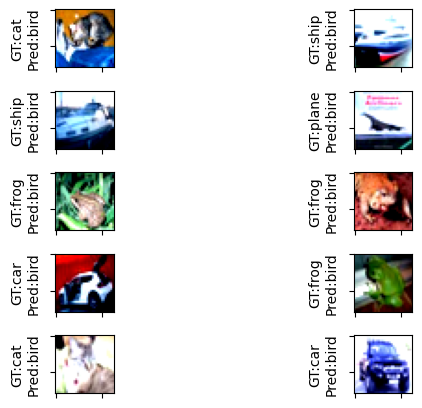

In [17]:
from tqdm import tqdm
from utilities.utils import show_images_lightning


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
image_tensor, pred, targ = show_images_lightning(model, valloader, classes, 0)

### Checking Grad Cam images of misclassified data


<Figure size 640x480 with 0 Axes>

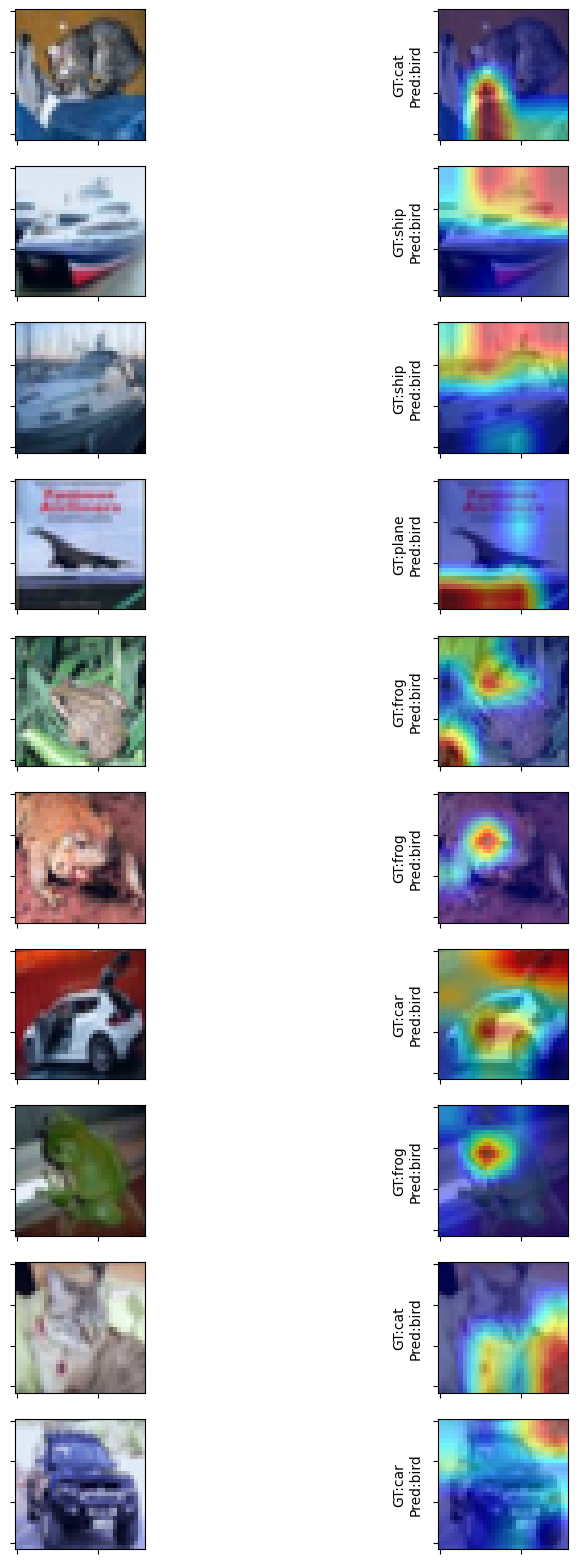

In [18]:
from utilities.utils import visualize_gradcam
target_layers = [model.layer3_r3[-1]]
visualize_gradcam(model, image_tensor, targ, pred, classes, target_layers)